# Fundamentos de Inteligência Artificial

## Estudo Dirigido: Grafos e Caminhos

Professores: João Pedro Campos e Cristiano Leite de Castro

Nosso objetivo é estudar, na prática, alguns algoritmos utilizados para explorar grafos e encontrar caminhos. Você deverá completar o código nas partes destinadas a isso, bem como responder às perguntas distribuídas ao longo do estudo.


Vamos começar criando as classes que definirão nosso objeto Grafo. Analise e execute o código abaixo. Nesta etapa, você não precisará programar nada.

In [1]:
class Edge:
    def __init__(self, u, v, w):
        self.u = u  # starting vertex
        self.v = v  # ending vertex
        self.w = w  # weight of the edge
    
    def __lt__(self, other):
        # This makes the edges comparable by weight for sorting
        return self.w < other.w
    
    def __str__(self):
        # String representation of an edge
        return f"{self.u} -> {self.v} ({self.w})"
    
    def __repr__(self):
        return self.__str__()

class Graph:
    def __init__(self):
        # Initialize a graph with no predefined number of vertices
        self.graph = {}  # key: vertex, value: list of edges
    
    def add_edge(self, u, v, w):
        # Add an edge from u to v with weight w
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []
        
        self.graph[u].append(Edge(u, v, w))
    
    def add_undirected_edge(self, u, v, w):
        # Add an undirected edge between u and v with weight w
        self.add_edge(u, v, w)
        self.add_edge(v, u, w)
    
    def __str__(self):
        # String representation of the entire graph
        result = []
        for u in self.graph:
            for edge in self.graph[u]:
                result.append(str(edge))
        return "\n".join(result)
    
    def get_edges(self):
        # Returns all edges in the graph
        edges = []
        for u in self.graph:
            for edge in self.graph[u]:
                edges.append(edge)
        return edges

    def out_degree(self, u):
        # Return the out-degree of vertex u
        if u in self.graph:
            return len(self.graph[u])
        else:
            raise ValueError(f"Vertex {u} not found in the graph.")
    
    def in_degree(self, v):
        # Return the in-degree of vertex v
        in_deg = 0
        for u in self.graph:
            for edge in self.graph[u]:
                if edge.v == v:
                    in_deg += 1
        return in_deg
    
    def get_neighbors(self, u):
        # Returns the neighbors of vertex u
        if u in self.graph:
            return [edge.v for edge in self.graph[u]]
        else:
            raise ValueError(f"Vertex {u} not found in the graph.")

    def get_true_neighbors(self, u):
        # criei por conveniência
        if u in self.graph:
            return [edge for edge in self.graph[u]]
        else:
            raise ValueError(f"Vertex {u} not found in the graph.")

1. Qual maneira foi escolhida para representar o grafo neste código? Quais as vantagens e desvantagens dela, comparada com outras formas populares de representação de grafos?
2. O código consegue representar grafos direcionados, não direcionados, ou ambos? Por quê? 

## Problema de Caminhos

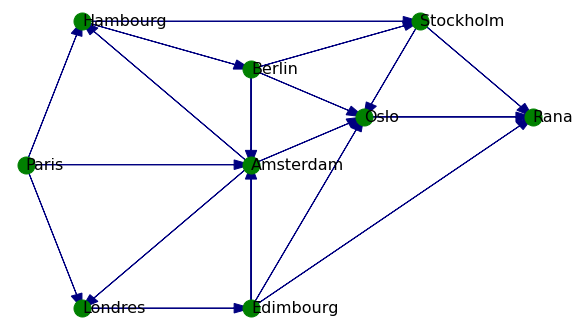

Considere o grafo acima, representando conexões entre algumas cidades da Europa. 
Obs: repare a função "add_edge", e note que ela pede que seja passado um peso da aresta. Por enquanto, vamos considerar que o grafo é não ponderado, e que todas as arestas têm peso igual a 1. Além disso, note que o grafo é direcionado, portanto a direção da aresta importa, e deve ser levada em conta na ordem dos argumentos da função "add_edge".

In [2]:
Europe = Graph()
Europe.add_edge("Paris", "Hambourg", 1)
Europe.add_edge("Paris", "Amsterdam", 1)
Europe.add_edge("Paris", "Londres", 1)
Europe.add_edge("Hambourg", "Stockholm", 1)
Europe.add_edge("Hambourg", "Berlin", 1)
Europe.add_edge("Amsterdam", "Oslo", 1)
Europe.add_edge("Amsterdam", "Hambourg", 1)
Europe.add_edge("Amsterdam", "Londres", 1)
Europe.add_edge("Londres", "Edimbourg", 1)
Europe.add_edge("Berlin", "Stockholm", 1)
Europe.add_edge("Berlin", "Oslo", 1)
Europe.add_edge("Berlin", "Amsterdam", 1)
Europe.add_edge("Edimbourg", "Amsterdam", 1)
Europe.add_edge("Edimbourg", "Oslo", 1)
Europe.add_edge("Edimbourg", "Rana", 1)
Europe.add_edge("Stockholm", "Oslo", 1)
Europe.add_edge("Stockholm", "Rana", 1)
Europe.add_edge("Oslo", "Rana", 1)


Execute a função "get_neighbors", passando como argumento o nó Paris. Verifique se os vizinhos retornados são de fato os vizinhos esperados, de acordo com a figura.

In [3]:
Europe.get_neighbors("Amsterdam")

['Oslo', 'Hambourg', 'Londres']

Agora, vamos implementar um algoritmo BFS (Breadth First Search) para explorar esse grafo. Vamos considerar que o nó de partida é a cidade de Paris.

In [4]:
from collections import deque

def bfs(graph, start):
    """Realiza a busca em largura (BFS) no grafo a partir de start."""
    dist = {vertex: float("inf") for vertex in graph.graph}  # Inicializa as distâncias como infinito
    predecessor = {vertex: None for vertex in graph.graph}  # Predecessor para reconstrução do caminho
    dist[start] = 0  # Distância do nó inicial é 0

    queue = deque([start])  # Fila para a busca em largura

    while queue:
        current = queue.popleft()
        for neighbor in graph.get_neighbors(current):
            if dist[neighbor] == float("inf"):
                dist[neighbor] = dist[current] + 1
                predecessor[neighbor] = current
                queue.append(neighbor)
        pass
    
    return dist, predecessor

def reconstruct_path(predecessor, start, end):
    """Reconstrói o caminho do vértice start até end usando o dicionário predecessor."""
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = predecessor[current]
    path.reverse()  # Inverte para obter na ordem correta
    return path if path[0] == start else []  # Retorna caminho válido ou vazio


dist, predecessor = bfs(Europe, "Paris")

# Exibir as distâncias mínimas
print("Menores distâncias (número de arestas):", dist)

# Exibir os caminhos para cada nó
for node in dist:
    print(f"Caminho para {node}: {reconstruct_path(predecessor, 'Paris', node)}")


Menores distâncias (número de arestas): {'Paris': 0, 'Hambourg': 1, 'Amsterdam': 1, 'Londres': 1, 'Stockholm': 2, 'Berlin': 2, 'Oslo': 2, 'Edimbourg': 2, 'Rana': 3}
Caminho para Paris: ['Paris']
Caminho para Hambourg: ['Paris', 'Hambourg']
Caminho para Amsterdam: ['Paris', 'Amsterdam']
Caminho para Londres: ['Paris', 'Londres']
Caminho para Stockholm: ['Paris', 'Hambourg', 'Stockholm']
Caminho para Berlin: ['Paris', 'Hambourg', 'Berlin']
Caminho para Oslo: ['Paris', 'Amsterdam', 'Oslo']
Caminho para Edimbourg: ['Paris', 'Londres', 'Edimbourg']
Caminho para Rana: ['Paris', 'Hambourg', 'Stockholm', 'Rana']


3. O que aconteceria se em vez de uma fila fosse utilizada uma estrutura de pilha?
4. Foi utilizada a estrutura 'deque', do pacote 'collections', para fazer a fila. Uma fila também poderia ser implementada utilizando a lista ('queue = []') nativa do python. Apesar de funcionar corretamente, tal abordagem não é recomendada. Pesquise e explique porquê.
5. Qual a complexidade algorítmica do método BFS? Por quê?

## Componentes Conectados

Imagine agora a situação seguinte: por algum motivo, algumas das conexões entre as cidades foram perdidas. Isso fez com que fossem criadas "ilhas" de cidades conectadas entre si, mas separadas das demais. O grafo resultante foi o seguinte:

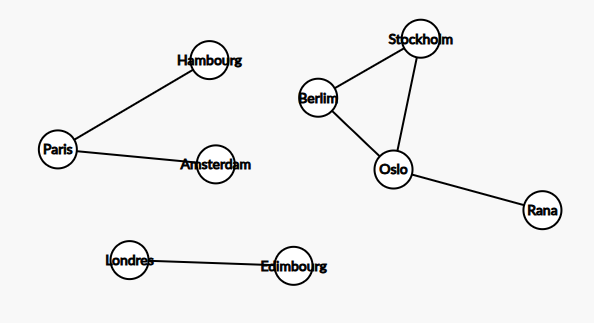

Crie um grafo novo para representar essa situação. Em seguida, modifique o código BFS para contar quantas "ilhas" foram criadas, ou seja, quantos componentes conectados entre si existem. Nesse caso, existem 3.

In [5]:
disconnected_europe = Graph()
# AQUI, USE A FUNÇÃO add_undirected_edge
disconnected_europe.add_undirected_edge("Paris", "Hambourg", 1)
disconnected_europe.add_undirected_edge("Paris", "Amsterdam", 1)

disconnected_europe.add_undirected_edge("Berlim", "Stockholm", 1)
disconnected_europe.add_undirected_edge("Berlim", "Oslo", 1)
disconnected_europe.add_undirected_edge("Oslo", "Stockholm", 1)
disconnected_europe.add_undirected_edge("Oslo", "Rana", 1)

disconnected_europe.add_undirected_edge("Londres", "Edimbourg", 1)
# adicione arestas


In [6]:
# Use BFS para contar o número de componentes conectados
from sympy import comp


def count_connected_components(graph):
    """Conta o número de componentes conectados usando BFS."""
    visited = set()  # Conjunto de nós visitados
    components = 0  # Contador de componentes conectados
    for vertex in graph.graph:
        if vertex not in visited:
            components += 1  # Novo componente encontrado
            queue = deque([vertex])
            while queue:
                current = queue.popleft()
                for neighbor in graph.get_neighbors(current):
                    if neighbor not in visited:
                        visited.add(neighbor)
                        queue.append(neighbor)
    
    return components

componentes = count_connected_components(disconnected_europe)
print("Número de componentes conectados:", componentes)

Número de componentes conectados: 3


## Caminho ótimo em grafo ponderado

Vamos, agora, imaginar que existem custos associados aos diferentes trajetos neste grafo. A figura baixo indica o custo de cada trecho. 

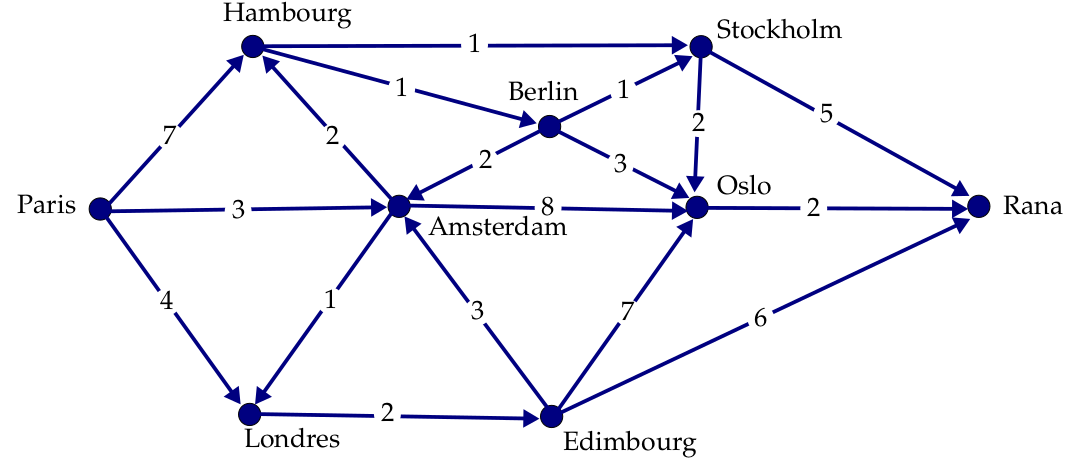

In [7]:
#  Grafo ponderado correspondente
Europe2 = Graph()
Europe2.add_edge("Paris", "Hambourg", 7)
Europe2.add_edge("Paris", "Amsterdam", 3)
Europe2.add_edge("Paris", "Londres", 4)
Europe2.add_edge("Hambourg", "Stockholm", 1)
Europe2.add_edge("Hambourg", "Berlin", 1)
Europe2.add_edge("Amsterdam", "Oslo", 8)
Europe2.add_edge("Amsterdam", "Hambourg", 2)
Europe2.add_edge("Amsterdam", "Londres", 1)
Europe2.add_edge("Londres", "Edimbourg", 2)
Europe2.add_edge("Berlin", "Stockholm", 1)
Europe2.add_edge("Berlin", "Oslo", 3)
Europe2.add_edge("Berlin", "Amsterdam", 2)
Europe2.add_edge("Edimbourg", "Amsterdam", 3)
Europe2.add_edge("Edimbourg", "Oslo", 7)
Europe2.add_edge("Edimbourg", "Rana", 6)
Europe2.add_edge("Stockholm", "Oslo", 2)
Europe2.add_edge("Stockholm", "Rana", 5)
Europe2.add_edge("Oslo", "Rana", 2)

Sua tarefa agora é implementar o algoritmo de Dijkstra para encontrar o menor caminho entre Paris e Rana. Considere que queremos saber o custo do caminho, e também as cidades por ele onde passa.

In [8]:
# Find the shortest path from Paris to Rana using Dijkstra's algorithm
from heapq import heappush, heappop

def dijkstra(graph, start):
    # Initialize the distance of all vertices to infinity
    dist = {vertex: float("inf") for vertex in graph.graph}
    predecessor = {vertex: None for vertex in graph.graph}
    dist[start] = 0  # Distance from start to start is 0
    
    # Initialize the priority queue with the start vertex
    pq = [(0, start)]  # (distance, vertex)
    while pq:
        dist_u, u = heappop(pq)
        if dist_u > dist[u]:
            continue  # Skip if we have already found a better path
        for edge in graph.get_true_neighbors(u):
            v = edge.v
            weight = edge.w
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                predecessor[v] = edge.u
                heappush(pq, (dist[v], v))
    return dist, predecessor

In [9]:
# test Dijkstra's algorithm
distances = dijkstra(Europe2, "Paris") #alterei para passar Europe2 ao invés de Europe2.graph (fica condizente com o resto do código também)

In [10]:
distances

({'Paris': 0,
  'Hambourg': 5,
  'Amsterdam': 3,
  'Londres': 4,
  'Stockholm': 6,
  'Berlin': 6,
  'Oslo': 8,
  'Edimbourg': 6,
  'Rana': 10},
 {'Paris': None,
  'Hambourg': 'Amsterdam',
  'Amsterdam': 'Paris',
  'Londres': 'Paris',
  'Stockholm': 'Hambourg',
  'Berlin': 'Hambourg',
  'Oslo': 'Stockholm',
  'Edimbourg': 'Londres',
  'Rana': 'Oslo'})

In [11]:
def reconstruct_path(predecessor, start, end):
    """Reconstrói o caminho do vértice start até end."""
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = predecessor[current]
    path.reverse()  # Inverte para obter na ordem correta
    return path if path[0] == start else []  # Retorna caminho válido ou vazio

In [12]:
# Testa o algoritmo de Dijkstra
dist, pred = dijkstra(Europe2, "Paris")
path = reconstruct_path(pred, "Paris", "Rana")
path

['Paris', 'Amsterdam', 'Hambourg', 'Stockholm', 'Oslo', 'Rana']